# Kymograph compiler

### Takes .npy arrays and plots them into kymographs

In [57]:
import os
import matplotlib.pyplot as plt
import numpy as np
import re

In [349]:
## paths
root_path = '/home/nathan/data/kraken/h2b/giulia/GV0812/analysis/'
fn_list = os.listdir(os.path.join(root_path, 'raw_numbers'))

In [356]:
def load_kymo_data(ID):
    scr_ID_fn = 'Scr_'+str(ID)
    fn = os.path.join(root_path, 'raw_numbers', scr_ID_fn)
    num_wt_fn = fn + '_num_wt.npy'
    num_wt_mito_fn = fn + '_num_wt_mito.npy'
    num_wt = np.load(num_wt_fn)
    num_wt_mito = np.load(num_wt_mito_fn)
    return num_wt, num_wt_mito

# Kymograph parameters

In [3]:
radius = 400
delta_t = 400
num_radial_bins = 20
radial_bin = radius / num_radial_bins
num_temporal_bins = 20
temporal_bin = delta_t / num_temporal_bins
print("size of temporal and radial bins:",temporal_bin,",", radial_bin)

size of temporal and radial bins: 20.0 , 20.0


In [407]:
### generate labels for axis PIXELS/FRAMES
xlocs = range(0, num_temporal_bins) ## step of 2 to avoid crowding
xlabels = []
for m in range(int(-num_temporal_bins/2), int(num_temporal_bins/2)):
    xlabels.append(str((num_temporal_bins)*m) + "," + str((num_temporal_bins)*m+20))
print("xlabels:",xlabels, type(xlabels))

ylocs = range(0, num_radial_bins, 1) ## step of 2 to avoid crowding
ylabels = []
for m in range(num_radial_bins-1, -1, -1):
    ylabels.append(str((num_radial_bins)*m+20) + "," + str((num_radial_bins)*m))
print("ylabels:", ylabels, type(ylabels))

xlabels: ['-200,-180', '-180,-160', '-160,-140', '-140,-120', '-120,-100', '-100,-80', '-80,-60', '-60,-40', '-40,-20', '-20,0', '0,20', '20,40', '40,60', '60,80', '80,100', '100,120', '120,140', '140,160', '160,180', '180,200'] <class 'list'>
ylabels: ['400,380', '380,360', '360,340', '340,320', '320,300', '300,280', '280,260', '260,240', '240,220', '220,200', '200,180', '180,160', '160,140', '140,120', '120,100', '100,80', '80,60', '60,40', '40,20', '20,0'] <class 'list'>


In [403]:
### generate labels for axis MICROMEters
xlocs = range(0, num_temporal_bins) ## step of 2 to avoid crowding
xlabels = []
for m in range(int(-num_temporal_bins/2), int(num_temporal_bins/2)):
    xlabels.append(str(round(((num_temporal_bins)*m)*4/60, 2)) + "," + str(round(((num_temporal_bins)*m+20)*4/60, 2)))
print("xlabels:",xlabels, type(xlabels))

ylocs = range(0, num_radial_bins, 1) ## step of 2 to avoid crowding
ylabels = []
for m in range(num_radial_bins-1, -1, -1):
    ylabels.append(str(round(((num_radial_bins)*m+20)*1.333,2)) + "," + str(round(((num_radial_bins*m)*1.333),2)))
print("ylabels:", ylabels, type(ylabels))

xlabels: ['-13.33,-12.0', '-12.0,-10.67', '-10.67,-9.33', '-9.33,-8.0', '-8.0,-6.67', '-6.67,-5.33', '-5.33,-4.0', '-4.0,-2.67', '-2.67,-1.33', '-1.33,0.0', '0.0,1.33', '1.33,2.67', '2.67,4.0', '4.0,5.33', '5.33,6.67', '6.67,8.0', '8.0,9.33', '9.33,10.67', '10.67,12.0', '12.0,13.33'] <class 'list'>
ylabels: ['533.2,506.54', '506.54,479.88', '479.88,453.22', '453.22,426.56', '426.56,399.9', '399.9,373.24', '373.24,346.58', '346.58,319.92', '319.92,293.26', '293.26,266.6', '266.6,239.94', '239.94,213.28', '213.28,186.62', '186.62,159.96', '159.96,133.3', '133.3,106.64', '106.64,79.98', '79.98,53.32', '53.32,26.66', '26.66,0.0'] <class 'list'>


# Single cell kymograph

In [ ]:
### single cell
#root_path = '/home/nathan/data/kraken/h2b/giulia/GV0807' 
#ID = 65
scr_ID_fn = 'Scr_'+str(ID)
fn = os.path.join(root_path,'raw_numbers', scr_ID_fn)
print(fn)
num_wt_fn = fn + '_num_wt.npy'
num_wt_mito_fn = fn + '_num_wt_mito.npy'
num_wt = np.load(num_wt_fn)
num_wt_mito = np.load(num_wt_mito_fn)

In [406]:
print(scr_ID_fn)

Scr_65


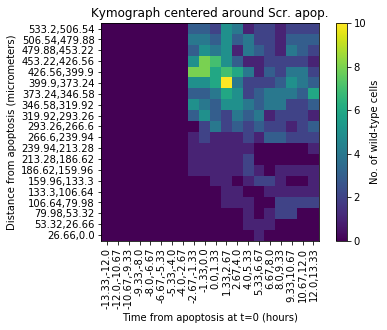

In [405]:
plt.xlabel("Time from apoptosis at t=0 (hours)")
plt.ylabel("Distance from apoptosis (micrometers)")
plt.title('Kymograph centered around Scr. apop.')
plt.imshow(np.flipud(num_wt))
plt.yticks(ylocs, ylabels)
plt.xticks(xlocs, xlabels, rotation='vertical')
plt.colorbar(label = 'No. of wild-type cells')

# Summed kymographs

In [359]:
sum_num_wt, sum_num_wt_mito = np.zeros((20,20)), np.zeros((20,20))
list_of_ids = list(dict.fromkeys([int(ID[0]) for ID in [re.findall(r'\d+', fn) for fn in fn_list if "Scr_" in fn]])) ### extracts IDs from file names, uses double list comp as the first is a list of lists and also removes duplicates using dict
for i in list_of_ids:
    #print(i)
    num_wt, num_wt_mito = load_kymo_data(i)
    sum_num_wt += num_wt
    sum_num_wt_mito += num_wt_mito

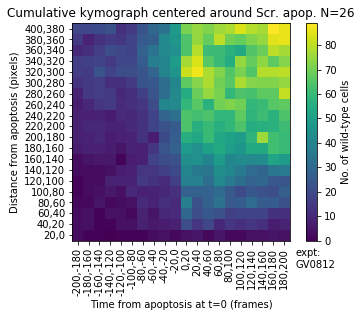

In [361]:
plt.xlabel("Time from apoptosis at t=0 (frames)")
plt.ylabel("Distance from apoptosis (pixels)")
title = 'Cumulative kymograph centered around Scr. apop. N=' + str(len(list_of_ids))
plt.title(title)
plt.imshow(np.flipud(sum_num_wt))
plt.yticks(ylocs, ylabels)
plt.xticks(xlocs, xlabels, rotation='vertical')
plt.colorbar(label = 'No. of wild-type cells')
expt_label = 'expt:\n' + root_path[36:42]
plt.text(20,22,expt_label)
save_title = 'Cumulative_kymo_no._wt.png'
plt.savefig(os.path.join(root_path, save_title), bbox_inches = 'tight', dpi = 300)

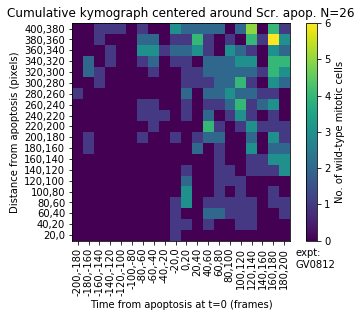

In [363]:
plt.xlabel("Time from apoptosis at t=0 (frames)")
plt.ylabel("Distance from apoptosis (pixels)")
title = 'Cumulative kymograph centered around Scr. apop. N=' + str(len(list_of_ids))
plt.title(title)
plt.imshow(np.flipud(sum_num_wt_mito))
plt.yticks(ylocs, ylabels)
plt.xticks(xlocs, xlabels, rotation='vertical')
plt.colorbar(label = 'No. of wild-type mitotic cells')
expt_label = 'expt:\n' + root_path[36:42]
plt.text(20,22,expt_label)
save_title = 'Cumulative_kymo_no._wt_mito.png'
plt.savefig(os.path.join(root_path, save_title), bbox_inches = 'tight', dpi = 300)

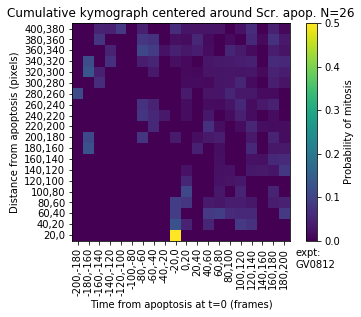

In [371]:
plt.xlabel("Time from apoptosis at t=0 (frames)")
plt.ylabel("Distance from apoptosis (pixels)")
title = 'Cumulative kymograph centered around Scr. apop. N=' + str(len(list_of_ids))
plt.title(title)
plt.imshow(np.flipud(sum_num_wt_mito)/(np.flipud(sum_num_wt)+1E-10))
plt.yticks(ylocs, ylabels)
plt.xticks(xlocs, xlabels, rotation='vertical')
plt.colorbar(label = 'Probability of mitosis')
expt_label = 'expt:\n' + root_path[36:42]
plt.text(20,22,expt_label)
save_title = 'Cumulative_kymo_prob_wt_mito.png'
plt.savefig(os.path.join(root_path, save_title), bbox_inches = 'tight', dpi = 300)